# rentabilisation du chiffre d'affaire de supermarché

# importation des librairies necessaires

In [2]:
import pandas as pd
import os # open system pour pouvoir importer les patchs ou chemin d'acces
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# creation du chemin d'acces ou path pour ouvrir la direction qui mene a la bd

In [3]:
path = r'C:\Users\Moi\Sales_Data'
files = [file for file in os.listdir(r'C:\Users\Moi\Sales_Data')]

# recuperation de tous les fichiers qui sont dans le chemin d'acces

In [4]:
files = [file for file in os.listdir(r'C:\Users\Moi\Sales_Data')]
for file in files : 
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


# la premiere analyse qu'on peut faire c'est qu'il va nous falloir examiner les ventes ou le chiffre d'affaire d'un super marché pour chaque mois
# on constate aussi qu'on peut avoir des données a caratères quantitative et qualitative
# on pourra faire une etude statistique, des visualisations avec matplotlib.


# aussi comme tous fichier sont de meme type et de meme origine, on peut les concatainer et en faire une grande base de données et c'est ca qui sera fera l'objet de notre etude

# Concatenation de tous les fichiers pour en faire un seul et unique dataset ou bd

In [6]:
files = [file for file in os.listdir(r'C:\Users\Moi\Sales_Data')]
base_donnees = pd.DataFrame() # pour creer un dataframe avec les entetes de donnees avant de remplir chaque colonnes graces au current_data
for file in files:
    current_data = pd.read_csv(path + '\\'+ file) # pour concatainer fichier par fichier. mais comme c'est une memoire ram on la stocke definitivemet dans base_donnees
    base_donnees = pd.concat([base_donnees, current_data])
base_donnees    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# origine : notre bd prend son origine des données relatives aux ventes faites dans les supermarchés des Etats de l'Amerique
# circonstances de créations : on a surement utilisé un ERP(logiciel de facturations) pour recuperer ces données 
# prévision sur la base de données : on peut essayer de prevoir quel est le produit le plus vendu, à quel moment de la journée ont peut faire des campagnes publicitaires
# bref apercu : les données sont representés sous formes matricielle de dimmension 186850*6 et nous remarquons égalementqu'il y a des valeurs manquantes. par exemple, il y a une facture qui a ete enregistrée mais sur laquelle on a aucun renseignement

In [9]:
base_donnees.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [11]:
base_donnees.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11676,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001"
11677,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
11678,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
11679,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001"
11680,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016"
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [14]:
base_donnees.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
# ici on a des objects parceque les 'ints' on ete convertis en caractères surement à l'aide du code ASKII 
# aussi on constate qu'il y a le meme nombre de données manquantes sur chaques colonnes


In [17]:
base_donnees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [18]:
base_donnees.duplicated().sum() # les données qui ont été les plus dupliquer ou les plus couramment vendus

1162

In [19]:
base_donnees.drop_duplicates(inplace = True) # pour supprimer toutes les valeurs dupliquer
base_donnees.duplicated().sum()

0

In [20]:
base_donnees.isna().sum() # pour indexer le nombre de valeurs manquantes par colonnes

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [ ]:
# ce qu'on obtient ici est en adéquation avec les valeurs manquantes qu'on a obtenu plus haut

In [22]:
base_donnees.loc[base_donnees.isna().any(axis = 1)] 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN


### interpretation :  il y a une facture qui a ete enregistrée mais sur laquelle on a aucun renseignement donc il peut s'agir d'un vol organisé. ainsi on peut envisager qu'il y a 3 suspects comme le chef d'agence, la caissiere et l'ingenieur geni logiciel

In [23]:
base_donnees.dropna(inplace = True)
base_donnees.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Données du mois de janvier

In [24]:
donnees_janvier = pd.read_csv(path+'\\'+'Sales_January_2019.csv')
donnees_janvier

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [43]:
donnees_janvier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [44]:
donnees_janvier.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


# Données du mois de Mars

In [25]:
donnees_mars = pd.read_csv(path+'\\'+'Sales_March_2019.csv')
donnees_mars

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [45]:
donnees_mars.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,15189,15189,15189,15189,15189,15189
unique,14550,20,8,19,11784,14247
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,35,1770,13779,1770,35,35


# Creéation d'un fichier csv qui va contenir tous nos fichiers

In [27]:
base_donnees.to_csv(path +'\\New_sales_data.csv', index = False)  # pour ne pas dupliquer les lignes qui ont les mêmes indices

# Verifications que nos elements ont pas changés

In [28]:
base_donnees.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

# les valeurs nulles représentent 0.2 pourcents de nos données donc on peut les supprimer

In [33]:
files = [file for file in os.listdir(r'C:\Users\Moi\Sales_Data')]
base_donnees = pd.DataFrame() # pour creer un dataframe avec les entetes de donnees avant de remplir chaque colonnes graces au current_data
for file in files:
    current_data = pd.read_csv(path + '\\'+ file) # pour concatainer fichier par fichier. mais comme c'est une memoire ram on la stocke definitivemet dans base_donnees
    base_donnees = pd.concat([base_donnees, current_data])
base_donnees 

C:\Users\Moi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [34]:
base_donnees
base_donnees.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# on constate que tous les colonnes ont le même nombre de valeurs nulles. et normalement on est pas sensé vendre un produit et puis par exemple dire qu'il a coûter zéro francs.
# on peut donc dire qu'il s'agit encore probablement d'une stratégie de vol organisée sois par la caissière, le concepteur génie logiciel et le chef d'agence

# Effacer les valeurs manquantes 

In [35]:
base_donnees = base_donnees.dropna(how = 'all')

In [36]:
base_donnees.shape

(371992, 6)

# la valeur qu'on obtient c'est celle qui reste apres la suppresssion des valeurs manquantes

In [37]:
base_donnees.describe() # donne le sommaire statistique des données a caractère quantitatif de la bd

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,371992,371992,371992,371992,371992,371992
unique,230935,20,18,41,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,356,43762,287329,37232,356,356


# comme toutes les données sont des objects, la fonction describe n'affiche pas la mediane, la moyenne, l'equart type...

In [38]:
base_donnees # la date est sous le format mois-jour-année

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
# Quel est le mois durant lequel l'entreprise a réalisé le meilleur chiffre d'affaire
# L'idée ici est d'extraire le mois dans la BD
# Ensuite voir le chiffre d'affaire réalisé chaque mois
# Split permet de découper une chaîne de caractère en plusieurs éléments

In [41]:
def Month(x): # on utilise le def lorsqu'on veut retourner une valeur
    return x.split('/')[0]
base_donnees['Month'] = base_donnees["Order Date"].apply(Month)

C:\Users\Moi\AppData\Local\Temp/ipykernel_2584/3431562526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_donnees['Month'] = base_donnees["Order Date"].apply(Month)


In [50]:
base_donnees

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [61]:
base_donnees['Quantity Ordered'] = pd.to_numeric(base_donnees['Quantity Ordered'], errors = 'coerce')
base_donnees['Price Each'] = pd.to_numeric(base_donnees['Price Each'], errors = 'coerce')

base_donnees['Total Sales'] = base_donnees['Quantity Ordered'] * base_donnees['Price Each']
base_donnees

C:\Users\Moi\AppData\Local\Temp/ipykernel_2584/4061576372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_donnees['Quantity Ordered'] = pd.to_numeric(base_donnees['Quantity Ordered'], errors = 'coerce')
C:\Users\Moi\AppData\Local\Temp/ipykernel_2584/4061576372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_donnees['Price Each'] = pd.to_numeric(base_donnees['Price Each'], errors = 'coerce')
C:\Users\Moi\AppData\Local\Temp/ipykernel_2584/4061576372.py:4: SettingWithCopyWarning: 
A value is 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [75]:
base_donnees= base_donnees[base_donnees['Month']!='Order Date']
base_donnees['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

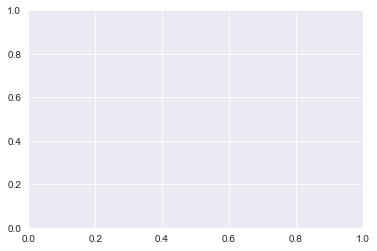

In [73]:
Month = range (1,13)

#plt.figure(figsize = (10, 6))
plt.bar(Month, vente_mois)
plt.xticks(Month)
plt.title('chiffre affaire en fonction des mois')
plt.xlabel('Month Number')
plt.ylabel('Sales in USD')
plt.show()